In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
CSV_PATH = "results/metrics_overall_by_step.csv"

df = pd.read_csv(CSV_PATH)
df = df.sort_values(["CuStepNo ValueY", "dataset_size"])

df.head()

,CuStepNo ValueY,dataset_size,n_features,n_anom,n_normal,threshold_percentile,threshold_value,accuracy,precision,recall,f1
0,1,100,25,10,90,90,3.399931e-17,0.8200,0.100,0.100,0.100
1,1,1000,26,100,900,90,2.488660e-02,0.8460,0.230,0.230,0.230
2,1,5000,26,500,4500,90,8.231567e-08,0.8496,0.248,0.248,0.248
3,3,100,23,10,90,90,2.387138e-25,0.8200,0.100,0.100,0.100
4,3,1000,24,100,900,90,3.547132e-16,0.8200,0.100,0.100,0.100


## Ergebnisse je Step

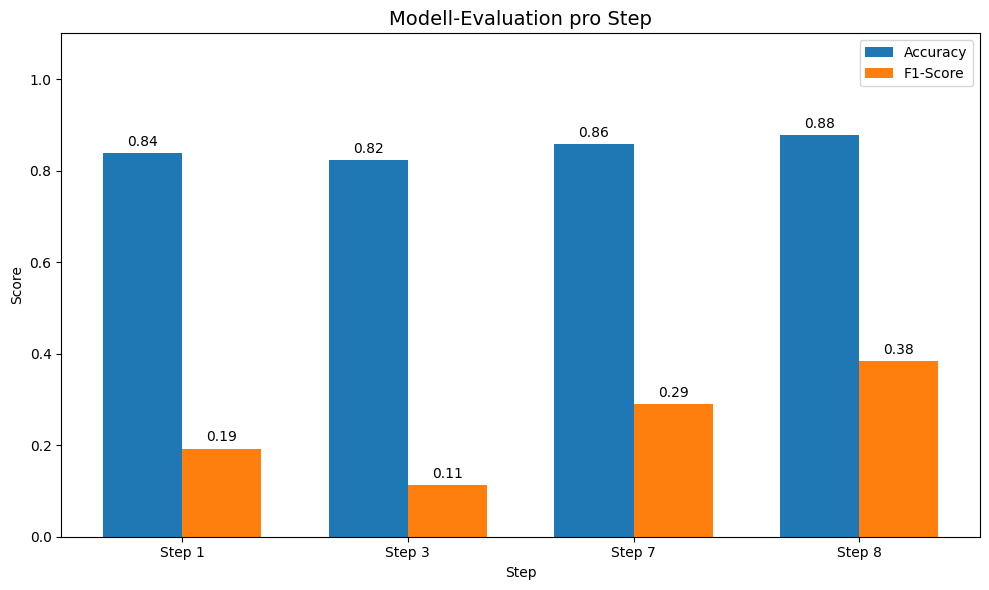

In [28]:
# Falls mehrere dataset_sizes vorhanden sind:
# Mittelwert pro Step berechnen
df_plot = (
    df.groupby("CuStepNo ValueY")[["accuracy", "f1"]]
    .mean()
    .reset_index()
    .sort_values("CuStepNo ValueY")
)

steps = df_plot["CuStepNo ValueY"].astype(str)
accuracy = df_plot["accuracy"]
f1_score = df_plot["f1"]

# -----------------------
# Plot
# -----------------------
x = np.arange(len(steps))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, accuracy, width, label="Accuracy")
bars2 = ax.bar(x + width/2, f1_score, width, label="F1-Score")

# Titel und Labels
ax.set_title("Modell-Evaluation pro Step", fontsize=14)
ax.set_xlabel("Step")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels([f"Step {s}" for s in steps])
ax.set_ylim(0, 1.1)
ax.legend()

# Werte über die Balken schreiben
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.tight_layout()
plt.show()


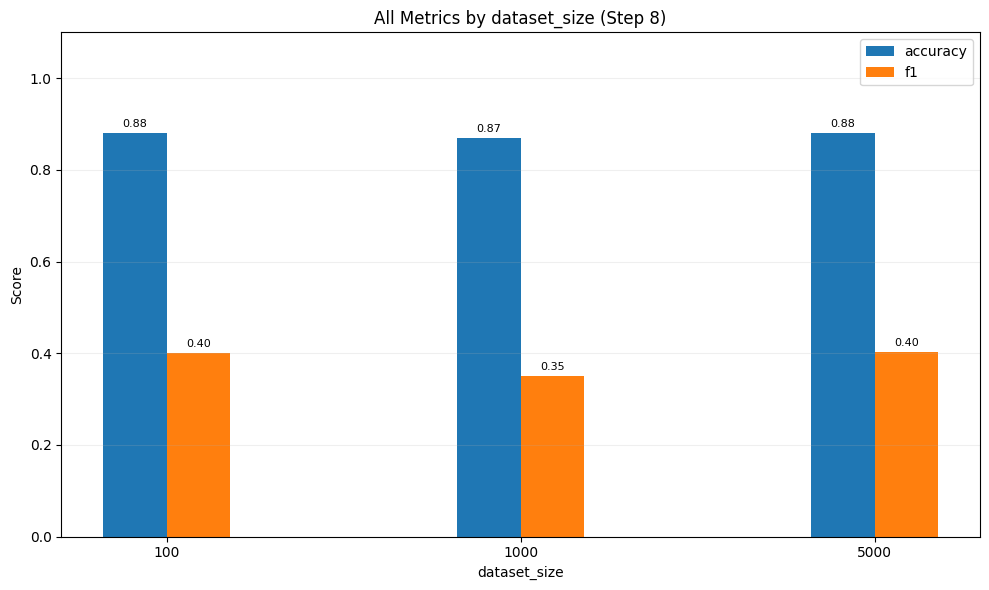

In [29]:
STEP = 8
METRICS = ["accuracy", "f1"]

df_step = df[df["CuStepNo ValueY"] == STEP].copy()

if df_step.empty:
    raise ValueError(f"No data found for Step {STEP}")

df_step = df_step.sort_values("dataset_size")

x = np.arange(len(df_step["dataset_size"]))
width = 0.18

fig, ax = plt.subplots(figsize=(10, 6))

for i, m in enumerate(METRICS):
    ax.bar(x + (i - (len(METRICS)-1)/2) * width,
           df_step[m].values,
           width,
           label=m)

ax.set_title(f"All Metrics by dataset_size (Step {STEP})")
ax.set_xlabel("dataset_size")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(df_step["dataset_size"].astype(str))
ax.set_ylim(0, 1.1)
ax.grid(axis="y", alpha=0.2)
ax.legend()

# Werte anzeigen
for i, m in enumerate(METRICS):
    vals = df_step[m].values
    for xi, yi in zip(x + (i - (len(METRICS)-1)/2) * width, vals):
        if np.isfinite(yi):
            ax.annotate(f"{yi:.2f}",
                        (xi, yi),
                        textcoords="offset points",
                        xytext=(0, 3),
                        ha="center", va="bottom",
                        fontsize=8)

plt.tight_layout()
plt.show()
